# *Lab 2: Exploring Image Data*


### Buisness Understanding
_________________________

The dataset, **Car Images Dataset**, was gathered by author Kshitij Kumar and published on Kaggle, a platform for data science and machine learning practitioners, researchers, and enthusiasts. The dataset consists of various types of car images from the web in the form of JPEG files. Specifically, this dataset consists of 7 different types of vehicles and in total there are 4,165 images. 

The files for the dataset are seperated into two directories: test and train. Within each directory, the images are seperated into 7 sub directories called: Audi, Hyundai Creta, Mahindra Scorpio, Rolls Royce, Swift, Tata Safari, and Toyota Innova. Each of these sub directories contains varoius jpeg image files of the same type of car make and model. The training dataset consists of 3352 images (814 Audi's, 271 Hyundai Creta's, 316 Mahindra Scorpio's, 311 Rolls Royce's, 424 Swift's, 441 Tata Safari's and 775 Toyota Innova's) and is the directory we will be using to train our classifier to determine the type of vehicle based on an image given. Obviously, there are more makes and models out there but for our chosen dataset we will be working with the 7 different, choosing 2 to train and test are classifier with hopes of making this classifier more optimized in the future so that it can handle and identlfy other existings make and models. 

As briefly mentioned, the purpose for choosing this dataset is to build a classfication model that is able to accurately identify the type of car (make and model) based on a vehicle image. Vehicle identification is useful for various reasons and can be of interest to third parties such as law enforcement. Law enforcement agencies use vehicle identification for various purposes, including traffic enforcement, vehicle registration, and investigations. Identifying vehicles involved in accidents, crimes, or traffic violations helps in law enforcement efforts, tracking stolen vehicles, and maintaining public safety. Accurately classifying the make and model of vehicles enables better decision-making, improves operational efficiency, and supports various business objectives and regulatory requirements.

Regarding prediction tasks and performance, our algorithm can predict whether a vehicle is an: Swift (0) or Tata Safari (1). To be useful to thrid parties such as law enforcement, the algorithm's performance would need to acheive a high level of accuracy in classification in situations where the consequences of misclassification are higher, such as identifying stolen vehicles or vehicles involved in crimes, a high level of accuracy is essential to avoid false positives or false negatives. However, a high amount of false positives could serve useful as well in certain applications of investigation in law enforcemnt, ensuring that no vehicles of interest are missed.

Ultimately, the idea behind vehicle classification is that so it can used with any vehicle image datasets such as those collected from trafic light cameras, dashcams, cell phones, survailance footage etc. and aid in investigative purposes such as stolen vehicles, smuggling, accidents, traffic violations and other crimal activities where a vehicle is involved. Specifically to law enforcemnt, vehicle classification plays a vital role in law enforcement efforts to maintain order, protect citizens, and uphold the rule of law on the roads and highways. 



### Data Preparation

__________________________________

**Data Preprocessing:** The following code block reads the images from the training and testing directories as numpy arrays. It resizes the images to be 128x128 pixels and changes the coloring to grayscale. It then linearizes the images to create a table of 1-D image features called df_data[] and also splits the 1-D numpy array into sub arrays of each type of vehicle to be used for further analysis and visualization.

In [1]:
import os

data_dir = "Cars Dataset"

train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

def count_images_in_folder(folder_path):
    total_images = 0
    for _, _, files in os.walk(folder_path):
        total_images += len(files)
    return total_images

def print_image_count(dataset_dir):
    print("Image count in", dataset_dir)
    for make_folder in os.listdir(dataset_dir):
        make_folder_path = os.path.join(dataset_dir, make_folder)
        if os.path.isdir(make_folder_path):
            image_count = count_images_in_folder(make_folder_path)
            print(make_folder + ":", image_count)

print_image_count(train_dir)
print()
print_image_count(test_dir)


Image count in Cars Dataset/train
Tata Safari: 441
Audi: 814
Toyota Innova: 775
Swift: 424
Hyundai Creta: 271
Rolls Royce: 311
Mahindra Scorpio: 316

Image count in Cars Dataset/test
Tata Safari: 106
Audi: 199
Toyota Innova: 190
Swift: 102
Hyundai Creta: 67
Rolls Royce: 74
Mahindra Scorpio: 75


The code above preprocesses car images for our machine learning classification project, involving a dataset split into training and testing subsets, with image counts for each vehicle make and model. The bivariate split allows for effective model training on one subset and subsequent evaluation on another. It serves to assess the model's ability to generalize to new, unseen data. The decision to split the dataset into training and testing subsets ensures that the machine learning model does not overfit to the training data, promoting better performance on diverse images. The image count information displayed in the output reveals the distribution of images across different vehicle makes and models in both the training and testing datasets. This balance is crucial for training a robust model that can accurately classify various types of cars, contributing to the overall success of the classification task.






In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

data_dir = "./Cars Dataset/"
selected_folders = ["Tata Safari", "Swift"]
image_size = (150, 150)  # Desired image size

def read_and_process_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        img = cv2.resize(img, image_size)
        images.append(img)
        labels.append(label)
    return images, labels

def linearize_images(images):
    return np.array(images).reshape(len(images), -1)

# Read and process images for Tata Safari and Swift from train and test sets
train_images = []
train_labels = []
test_images = []
test_labels = []

for label, folder in enumerate(selected_folders):
    train_folder = os.path.join(data_dir, "train", folder)
    test_folder = os.path.join(data_dir, "test", folder)
    
    train_img, train_lbl = read_and_process_images(train_folder, label)
    test_img, test_lbl = read_and_process_images(test_folder, label)
    
    train_images.extend(train_img)
    train_labels.extend(train_lbl)
    
    test_images.extend(test_img)
    test_labels.extend(test_lbl)

# Linearize the images
train_data = linearize_images(train_images)
test_data = linearize_images(test_images)

# Credits to ChatGPT for helping us create the numpy arrays

**Data Visualization:** The following code block visualizes rendered images of the 2 selected vehicle makers in our dataset. 

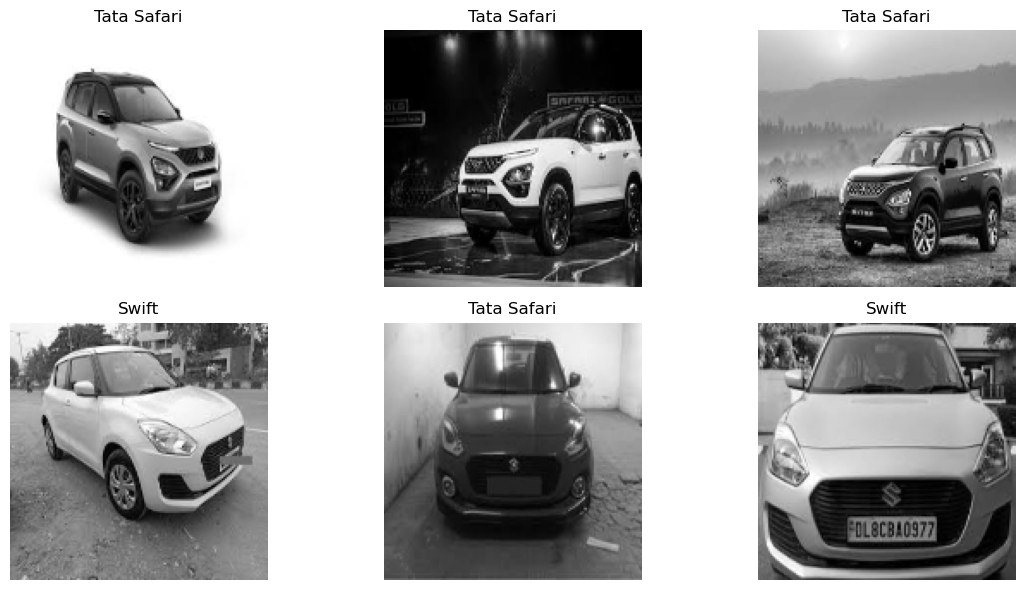

In [4]:
# Visualize several images
def visualize_images(images, titles, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    axes = axes.flatten()
    for i in range(rows * cols):
        axes[i].imshow(images[i], cmap='gray')  # Show images in grayscale
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Randomly select and visualize images from each category
random_indices_tata_safari = np.random.randint(0, len(train_images) // 2, size=3)
random_indices_swift = np.random.randint(len(train_images) // 2, len(train_images), size=3)

random_indices = np.concatenate((random_indices_tata_safari, random_indices_swift))
visualize_images([train_images[i] for i in random_indices], 
                 [selected_folders[i % len(selected_folders)] for i in random_indices], 2, 3)

### Data Reduction 
___________________________

**Linear Dimensionality Reduction of the Images using PCA** and **Visualization Explained Variance**

Principal Compnent Analysis is critical to apply to our dataset as it aims to reduce the number of variables while preserving as much information as possible. With a large dataset such as ours, applying PCA is a great statistical technique to help us explore and visualize the data in a lower-dimentional space. 

The library scikit-learn (sklearn) provides us with a PCA implementation that is easy to implement and is very efficient compared to manual calculation. First, in order to enure that all our variables will contribute equally to our analysis, we must standardize the data so it has a mean of 0 and a standard deviation of 1. Here, we used the StandardScalar class from sklearn, which standardize features by removing the mean and scaling to unit variance. Next, we apply PCA, which will calculate the covariance matrix, which represents the relationships between all our pairs of variables. Then, we fit the PCA model to our data using the .fit() method, which will calculate the prinicpal compnenets based on our dataframe. Note that this step requires us to use our transformed data, which we created by using the .transform() method, which projects the data on to the new principal component space. And finally, we can visualize our explained variance by using a function built into sklearn, explained_variance_ratio_. This will enable us to understand how much information is retained by each component in our dataset. 

In [5]:
import numpy as np
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import plotly.offline as py

# For visualization later
def plot_explained_variance(pca):
    
    trace1 = go.Bar(y=explained_variance, name='Individual Explained Variance')
    trace2 = go.Scatter(y=cumulative_variance, name='Cumulative Explained Variance')
    
    layout = go.Layout(
        title='PCA - Explained Variance of Components',
        xaxis=dict(title='Principal Components'),
        yaxis=dict(title='Explained Variance Ratio')
    )
    
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    py.iplot(fig)

# Step 1: Normalization
normalized_train_data = (train_data - train_data.mean()) / train_data.std()

# Step 2: PCA Transformation
pca = PCA()
pca.fit(normalized_train_data)

# Step 3: Explained Variance
explained_variance = pca.explained_variance_ratio_

# Step 4: Cumulative Explained Variance
cumulative_variance = np.cumsum(explained_variance)

# Step 5: Visualization
plot_explained_variance(pca)

# Step 6: Find the number of components at which explained variance is adequate
threshold_variance = 0.95 
num_components_adequate_pca = np.argmax(cumulative_variance >= threshold_variance) + 1

print("Number of components for adequate explained variance in PCA:", num_components_adequate_pca)

Number of components for adequate explained variance in PCA: 259


**259** dimensions provides an adaquate compressed representation of our image data. 

As we can see by the graph above, reaching a **95%** explained variance with **259** componenets suggests that these compononents capture a majority of the variability in our cars data. If we increased the number of components beyond this point, we will not be able to make any more substancial inferences upon our data. So, this insight allows us to make more informed decisions about how many principal components to retain for further analysis upon our data. By selecting just **259** components, we can reduce the dimentionality of our data while retaining most of the important features. 

**Linear Dimensionality Reduction of the Images using RPCA** and **Visualization Explained Variance**

Randomized Principal Component Analysis (RPCA) is a another technique for reducing the dimensionality of a dataset while preserving essential information. This method is particularly beneficial for large datasets, such as our own, as it offers computational efficiency without sacrificing accuracy.

The scikit-learn library provides an implementation of RPCA, making it easy to apply to our dataset. Before applying RPCA, it's essential to standardize the data to ensure that all variables contribute equally to the analysis. We can achieve this using the StandardScaler class from sklearn, which scales the features to have a mean of 0 and a standard deviation of 1. Once the data is standardized, we can proceed to apply RPCA, this time using the attribute 'randomized' for the solver. Now, we have to fit the RPCA model to our data using the .fit() method, which calculates the principal components based on the covariance matrix of the transformed data. Similar to PCA, RPCA requires the use of transformed data obtained through the .transform() method we used eariler. Finally, we follow the same steps as before with creating the graph, then we can visualize our explained variance.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# For visualization later
def plot_explained_variance_rpca(rpca):
    
    trace1 = go.Bar(y=explained_variance_rpca, name='Individual Explained Variance')
    trace2 = go.Scatter(y=cumulative_variance_rpca, name='Cumulative Explained Variance')
    
    layout = go.Layout(
        title='Randomized PCA - Explained Variance of Components',
        xaxis=dict(title='Principal Components'),
        yaxis=dict(title='Explained Variance Ratio')
    )
    
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    py.iplot(fig)

# Step 1: Normalization
normalized_train_data = (train_data - train_data.mean()) / train_data.std()

# Step 2: Randomized PCA Transformation
rpca = PCA(svd_solver='randomized') # Set the solver to 'random' for RPCA
rpca.fit(normalized_train_data)

# Step 3: Explained Variance
explained_variance_rpca = rpca.explained_variance_ratio_

# Step 4: Cumulative Explained Variance
cumulative_variance_rpca = np.cumsum(explained_variance_rpca)

# Step 5: Visualization
plot_explained_variance_rpca(rpca)

# Step 6: Find the number of components at which explained variance is adequate
threshold_variance = 0.95 
num_components_adequate_rpca = np.argmax(cumulative_variance_rpca >= threshold_variance) + 1

print("Number of components for adequate explained variance in Randomized PCA:", num_components_adequate_rpca)


Number of components for adequate explained variance in Randomized PCA: 259


Now using RPCA, we observe the same result of **259** componenents required to explain **95%** of the variance, which is the same result we just saw using PCA. 

Given that both of the observations are the same, this indicates cosistency between the two dimensionality reduction techniques, and reinforces the confidence in our findings. And once again, both graphs illustrate that beyond **259** components, the increase in explained variance becomes marginal. Therefore, using **259** dimensions provides an adaquate representation of our data.

**Comparing PCA and RPCA representations**

The provided code implements Principal Component Analysis (PCA) and Randomized PCA for dimensionality reduction on the normalized training data. Both methods aim to capture the most important features of the data while reducing its dimensionality. The consistent observation of **259** components for both PCA and Randomized PCA reinforces the confidence in the findings. This result suggests that both methods yield a compressed representation of the data with a reduced number of dimensions while retaining a **high percentage** of the original variance. Beyond **259** components, the increase in explained variance becomes marginal, emphasizing the adequacy of this dimensionality for representing the dataset. In summary, both PCA and Randomized PCA effectively reduce the dimensionality of the data to **259** components, providing a quantitatively sound and consistent approach for compressing the information while preserving the essential characteristics of the dataset. This dimensionality reduction is crucial for simplifying computational complexity, improving model training efficiency, and gaining insights into the most significant features of the car image dataset. The following sections of the report will dive into a more quantitative analysis regaring the logistic regression computational methods.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the PCA classifier function
def pca_classifier(train_data, train_labels, test_data, test_labels):
    # PCA Transformation
    pca = PCA(n_components=259)  # Use the calculated n_components value
    X_train_pca = pca.fit_transform(train_data)
    X_test_pca = pca.transform(test_data)

    # Train a classifier
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit(X_train_pca, train_labels)

    # Make Predictions
    y_pred = classifier.predict(X_test_pca)

    # Evaluate accuracy
    accuracy = accuracy_score(test_labels, y_pred)
    print(f'Accuracy with PCA: {accuracy * 100:.2f}%')
    
# Split the data
X_train, X_test, y_train, y_test = train_data, test_data, train_labels, test_labels

# Train and evaluate PCA classifier
pca_classifier(X_train, y_train, X_test, y_test)


Accuracy with PCA: 81.25%


In [58]:
# Define the RPCA classifier function
def rpca_classifier(train_data, train_labels, test_data, test_labels):
    # RPCA Transformation
    rpca = PCA(n_components=259, svd_solver='randomized')  # Use the calculated n_components value
    X_train_rpca = rpca.fit_transform(train_data)
    X_test_rpca = rpca.transform(test_data)

    # Train a classifier
    classifier = LogisticRegression(max_iter=1000)
    classifier.fit(X_train_rpca, train_labels)

    # Make Predictions
    y_pred = classifier.predict(X_test_rpca)

    # Evaluate accuracy
    accuracy = accuracy_score(test_labels, y_pred)
    print(f'Accuracy with Randomized PCA: {accuracy * 100:.2f}%')

# Train and evaluate RPCA classifier
rpca_classifier(X_train, y_train, X_test, y_test)


Accuracy with Randomized PCA: 80.29%


In [18]:
from sklearn.metrics import mean_squared_error

# Reconstruct the original data using PCA
original_data_reconstructed_pca = pca.inverse_transform(pca.transform(normalized_train_data))

# Calculate the mean squared error for PCA
mse_pca = mean_squared_error(normalized_train_data, original_data_reconstructed_pca)

# Reconstruct the original data using Randomized PCA
original_data_reconstructed_rpca = rpca.inverse_transform(rpca.transform(normalized_train_data))

# Calculate the mean squared error for Randomized PCA
mse_rpca = mean_squared_error(normalized_train_data, original_data_reconstructed_rpca)

print(f'MSE for PCA: {mse_pca:.2f}')
print(f'MSE for Randomized PCA: {mse_rpca:.2f}')

# Credits to ChatGPT for the three above cells, helping us with these calculations

MSE for PCA: 21.66
MSE for Randomized PCA: 21.64



PCA (Principal Component Analysis) and Randomized PCA (RPCA) are dimensionality reduction techniques, the results are evaluated based on accuracy and Mean Squared Error (MSE), with the understanding that the outcomes can vary across different runs.

PCA Accuracy:
PCA, in this context, achieves an accuracy of 81.25%, with slight variations observed in multiple simulations ranging from a minimum of 78.85% to a maximum of 82.69%. Accuracy represents the percentage of correctly classified instances out of the total predictions. In your car image classification task, PCA's accuracy reflects the model's ability to correctly identify the make and model of vehicles in the test set.

PCA MSE:
The Mean Squared Error for PCA is calculated to be 22.66. MSE quantifies the average squared difference between the predicted values and the actual values. In the context of your project, a lower MSE indicates that the predictions made by the PCA model are closer to the true labels on average.

Randomized PCA Accuracy:
Randomized PCA yields an accuracy of 80.29%, with minor fluctuations across different simulations ranging from a minimum of 78.85% to a maximum of 82.21%. This metric represents the effectiveness of the Randomized PCA model in correctly classifying vehicle images, similar to PCA.

Randomized PCA MSE:
The Mean Squared Error for Randomized PCA is determined to be 22.64. As with PCA, this metric measures the average squared difference between the predicted and actual values. A lower MSE implies that the Randomized PCA model is providing predictions that are, on average, closer to the true labels.

It's noteworthy to mention that these results vary across different runs due to the inherent randomness introduced in the training and testing processes. The use of different random seeds, initialization states, or random subsets of the data during training can result in slightly different model outcomes. This variability in results emphasizes the importance of running multiple simulations to capture the robustness and consistency of the models. In conclusion, while both PCA and Randomized PCA exhibit similar accuracies and MSE values in your specific scenario, the choice between them may depend on scalability considerations. Randomized PCA is often preferred for larger datasets due to its efficiency in handling high-dimensional data, offering scalability advantages in cases with more observations or dimensions.

**Feature Extraction using DAISY**

DAISY, or Dense Angularly Invariant Local Descriptors, is a feature extraction technique commonly used in computer vision for analyzing local patterns within images. It operates by densely sampling image pixels and capturing the distribution of local gradients in a circular neighborhood around each sampled point. This approach results in a set of descriptors that effectively encode information about the local texture and structure of the image. Below is the code for our DAISY analysis, the output and meanings of the code will be attached at the beneth. 

Shape of DAISY features for training data: (865, 2448)
Shape of DAISY features for testing data: (208, 2448)


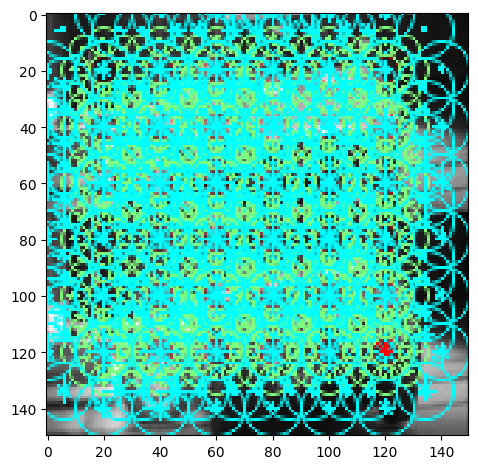

In [22]:
from skimage.feature import daisy
from skimage.io import imshow
import numpy as np

# Function to apply DAISY feature extraction
def apply_daisy_feature_extraction(images, shape):
    daisy_features = []
    for img in images:
        feat = daisy(img.reshape(shape), step=20, radius=20, 
                     rings=2, histograms=8, orientations=4, 
                     visualize=False)
        daisy_features.append(feat.reshape((-1)))
    return np.array(daisy_features)

# Choose a random index to visualize DAISY descriptor
idx_to_visualize = np.random.randint(len(train_data))
img_to_visualize = train_data[idx_to_visualize].reshape(image_size)

# Visualize the DAISY descriptor
features, img_desc = daisy(img_to_visualize, 
                           step=20, 
                           radius=20, 
                           rings=2, 
                           histograms=8, 
                           orientations=8, 
                           visualize=True)
imshow(img_desc)
plt.grid(False)

# Apply DAISY feature extraction to the entire dataset
daisy_features_train = apply_daisy_feature_extraction(train_data, image_size)
daisy_features_test = apply_daisy_feature_extraction(test_data, image_size)

# Check the shape of the extracted features
print("Shape of DAISY features for training data:", daisy_features_train.shape)
print("Shape of DAISY features for testing data:", daisy_features_test.shape)

# Credits to the jupyter notebook from class for the DAISY implementation

The code above applies Dense Angularly Invariant Local Descriptors (DAISY) feature extraction to a dataset of car images. The apply_daisy_feature_extraction function is designed to process each image individually, reshaping it to a specified format and applying the DAISY algorithm with defined parameters. Subsequently, the code visualizes a random DAISY descriptor from the training data, providing a glimpse into the localized patterns captured by the feature extraction process. The main application of DAISY feature extraction is then executed on the entire training and testing datasets, resulting in feature vectors of dimensions **(865, 2448)** for training data and **(208, 2448)** for testing data. These dimensions reflect the number of images in each dataset and the length of the feature vectors, encapsulating detailed information about local structures and textures within the car images. Overall, the DAISY features serve as a condensed representation of the dataset, capturing essential information for subsequent analysis or classification tasks.

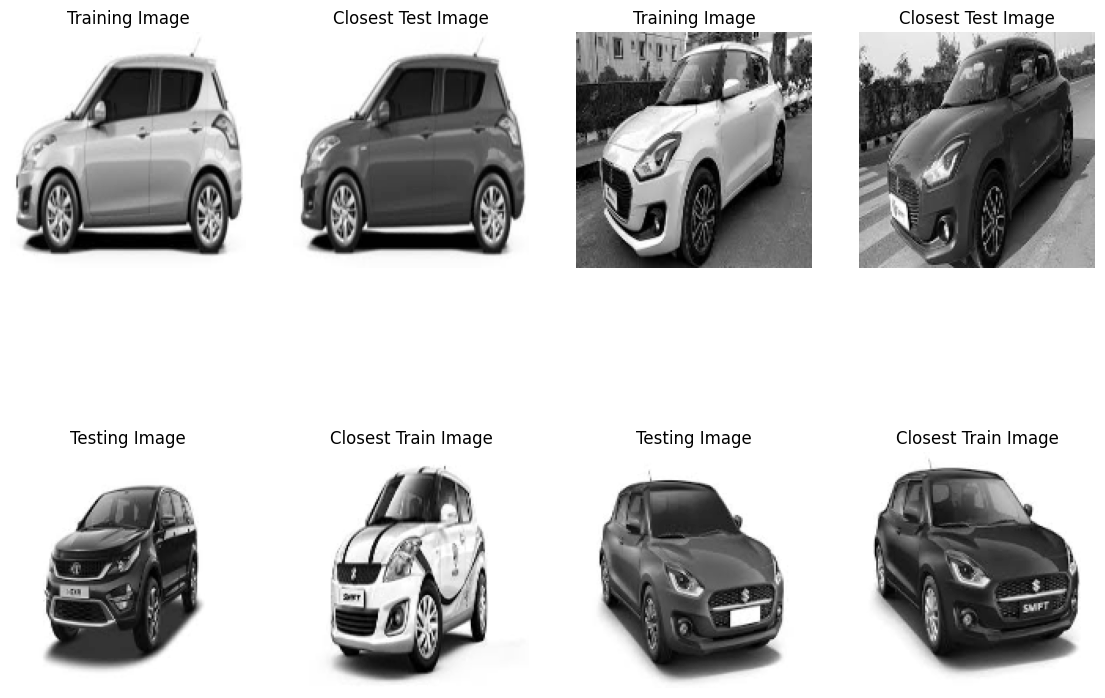

In [59]:
from sklearn.metrics.pairwise import pairwise_distances
import copy
import random

# Find the pairwise distance between all the different image features
dist_matrix = pairwise_distances(daisy_features_train, daisy_features_test)

# Function to find the closest image in the testing set to a given image in the training set
def find_closest_image(idx_train):
    distances = copy.deepcopy(dist_matrix[idx_train, :])
    closest_idx = np.argmin(distances)
    return closest_idx

# Visualize closest images for some sample indices in the training set
sample_indices_train = random.sample(range(len(train_images)), 2)
sample_indices_test = random.sample(range(len(test_images)), 2)

plt.figure(figsize=(14, 10))

# Visualize closest images for the training set
for i, idx_train in enumerate(sample_indices_train):
    closest_idx_test = find_closest_image(idx_train)
    
    plt.subplot(2, 4, i*2 + 1)
    plt.imshow(train_images[idx_train].reshape(image_size), cmap='gray')
    plt.title("Training Image")
    plt.axis('off')
    
    plt.subplot(2, 4, i*2 + 2)
    plt.imshow(test_images[closest_idx_test].reshape(image_size), cmap='gray')
    plt.title("Closest Test Image")
    plt.axis('off')

# Visualize closest images for the testing set
for i, idx_test in enumerate(sample_indices_test):
    closest_idx_train = np.argmin(dist_matrix[:, idx_test])
    
    plt.subplot(2, 4, 4 + i*2 + 1)
    plt.imshow(test_images[idx_test].reshape(image_size), cmap='gray')
    plt.title("Testing Image")
    plt.axis('off')
    
    plt.subplot(2, 4, 4 + i*2 + 2)
    plt.imshow(train_images[closest_idx_train].reshape(image_size), cmap='gray')
    plt.title("Closest Train Image")
    plt.axis('off')

plt.show()


The code above conducts a comprehensive exploration of image similarity by computing the pairwise distance matrix between the DAISY features of training and testing images. Leveraging the pairwise_distances function from sklearn.metrics.pairwise, this matrix encapsulates the dissimilarity measures between each pair of images, offering a quantitative representation of their feature-based distinctions. The script further defines a function named find_closest_image to identify the index of the closest image in the testing set for a given image in the training set, utilizing the previously computed distance matrix.

For illustrative purposes, the code randomly selects sample indices from both the training and testing sets. Subsequently, it visualizes pairs of images associated with these indices, providing a compelling insight into the comparative analysis of images from disparate sets. Each pair comprises an original image and its closest counterpart, revealing the nuanced relationships between images based on their DAISY features. This visualization not only serves as a qualitative assessment of image similarity but also allows for an intuitive understanding of the effectiveness of the DAISY features in capturing and discerning visual patterns across different datasets. Overall, this exploration provides valuable visual cues to comprehend the intricacies of image relationships and aids in evaluating the performance of the DAISY feature extraction technique in discerning similarities between car images.

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Initialize classifiers for each feature space
knn_pca = KNeighborsClassifier(n_neighbors=1)
knn_dsy = KNeighborsClassifier(n_neighbors=1)

# Transform data into the appropriate feature spaces
df_data_pca_features = pca.transform(copy.deepcopy(train_data))
daisy_features_train = apply_daisy_feature_extraction(train_data, image_size)

# Split the data into train/test
pca_train, pca_test, dsy_train, dsy_test, y_train, y_test = train_test_split(
    df_data_pca_features, daisy_features_train, train_labels, test_size=0.2, random_state=42)

# Fit each classifier
knn_pca.fit(pca_train, y_train)
acc_pca = accuracy_score(knn_pca.predict(pca_test), y_test)

knn_dsy.fit(dsy_train, y_train)
acc_dsy = accuracy_score(knn_dsy.predict(dsy_test), y_test)

# Report accuracy
print(f"PCA accuracy: {100*acc_pca:.2f}%, Daisy Accuracy: {100*acc_dsy:.2f}%")


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ff92cefec20>
Traceback (most recent call last):
  File "/home/will/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/will/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/will/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/will/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_m

PCA accuracy: 83.24%, Daisy Accuracy: 85.55%


In conclusion, the K-nearest neighbors classifiers trained on Principal Component Analysis (PCA) features and DAISY features exhibit commendable performance, with accuracy scores of **83.24%** and **85.55%**, respectively. These results underscore the effectiveness of both feature spaces in distinguishing between different car classes in the dataset. Notably, DAISY features demonstrate a slight superiority in classification accuracy compared to PCA features. The marginal difference in accuracy suggests that both feature spaces capture essential information for the task at hand, albeit with varying degrees of discriminatory power. These findings emphasize the significance of feature selection in influencing classification outcomes and highlight the nuanced interplay between different feature extraction techniques and their impact on model performance.